In [1]:
from PIL import Image
import cv2 as cv
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
import warnings, cv2
warnings.filterwarnings('ignore')
from tqdm.notebook import tqdm
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [2]:
#  drive mount

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train_dir = "/content/drive/MyDrive/ Driver-Drowsiness-Detection-System/dataset_new/train/"
test_dir = "/content/drive/MyDrive/ Driver-Drowsiness-Detection-System/dataset_new/test/"

In [4]:
import os
import numpy as np

In [5]:
def load_images(directory):
    images = []
    labels = []

    for category in os.listdir(directory):
        for filename in tqdm(os.listdir(directory+category)):
            image_path = os.path.join(directory,category,filename)

            image = cv2.imread(image_path)
            image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
            image = cv2.resize(image,(224,224))

            images.append(image)
            labels.append(category)

    images = np.array(images,dtype='float32')
    return images, labels

In [6]:
def load_images_grayscale(directory):
    images = []
    labels = []

    for category in os.listdir(directory):
        for filename in tqdm(os.listdir(directory+category)):
            image_path = os.path.join(directory,category,filename)

            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image,(224,224))

            images.append(image)
            labels.append(category)

    images = np.array(images,dtype='float32')
    return images, labels

In [7]:
def load_images_histogram_normalised(directory):
    images = []
    labels = []

    for category in os.listdir(directory):
        for filename in tqdm(os.listdir(os.path.join(directory, category))):
            image_path = os.path.join(directory, category, filename)

            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            # Histogram normalization
            image = cv2.equalizeHist(image)

            image = cv2.resize(image, (224, 224))

            images.append(image)
            labels.append(category)

    images = np.array(images, dtype='float32')
    return images, labels

In [8]:
def load_images_resolution_64(directory):
    images = []
    labels = []

    for category in os.listdir(directory):
        for filename in tqdm(os.listdir(os.path.join(directory, category))):
            image_path = os.path.join(directory, category, filename)

            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, (64, 64))

            images.append(image)
            labels.append(category)

    images = np.array(images, dtype='float32')
    return images, labels

In [9]:
#non preprocessed train and test data
X_train, y_train = load_images(train_dir)
X_test, y_test = load_images(test_dir)

#grayscale train and test data
X_train_grayscale, y_train_grayscale = load_images_grayscale(train_dir)
X_test_grayscale, y_test_grayscale = load_images_grayscale(test_dir)

#histogram normalised train and test data
X_train_histogram_normalised, y_train_histogram_normalised = load_images_histogram_normalised(train_dir)
X_test_histogram_normalised, y_test_histogram_normalised = load_images_histogram_normalised(test_dir)

#64 x 64 resolution
X_train_resolution_64, y_train_resolution_64= load_images_resolution_64(train_dir)
X_test_resolution_64, y_test_resolution_64 = load_images_resolution_64(test_dir)


  0%|          | 0/636 [00:00<?, ?it/s]

  0%|          | 0/617 [00:00<?, ?it/s]

  0%|          | 0/616 [00:00<?, ?it/s]

  0%|          | 0/627 [00:00<?, ?it/s]

  0%|          | 0/109 [00:00<?, ?it/s]

  0%|          | 0/109 [00:00<?, ?it/s]

  0%|          | 0/109 [00:00<?, ?it/s]

  0%|          | 0/106 [00:00<?, ?it/s]

  0%|          | 0/636 [00:00<?, ?it/s]

  0%|          | 0/617 [00:00<?, ?it/s]

  0%|          | 0/616 [00:00<?, ?it/s]

  0%|          | 0/627 [00:00<?, ?it/s]

  0%|          | 0/109 [00:00<?, ?it/s]

  0%|          | 0/109 [00:00<?, ?it/s]

  0%|          | 0/109 [00:00<?, ?it/s]

  0%|          | 0/106 [00:00<?, ?it/s]

  0%|          | 0/636 [00:00<?, ?it/s]

  0%|          | 0/617 [00:00<?, ?it/s]

  0%|          | 0/616 [00:00<?, ?it/s]

  0%|          | 0/627 [00:00<?, ?it/s]

  0%|          | 0/109 [00:00<?, ?it/s]

  0%|          | 0/109 [00:00<?, ?it/s]

  0%|          | 0/109 [00:00<?, ?it/s]

  0%|          | 0/106 [00:00<?, ?it/s]

  0%|          | 0/636 [00:00<?, ?it/s]

  0%|          | 0/617 [00:00<?, ?it/s]

  0%|          | 0/616 [00:00<?, ?it/s]

  0%|          | 0/627 [00:00<?, ?it/s]

  0%|          | 0/109 [00:00<?, ?it/s]

  0%|          | 0/109 [00:00<?, ?it/s]

  0%|          | 0/109 [00:00<?, ?it/s]

  0%|          | 0/106 [00:00<?, ?it/s]

In [10]:
X_train = X_train / 255.
X_test = X_test / 255.

X_train_grayscale = X_train_grayscale / 255.
X_test_grayscale = X_test_grayscale / 255.

X_train_histogram_normalised = X_train_histogram_normalised / 255.
X_test_histogram_normalised = X_test_histogram_normalised / 255.

X_train_resolution_64 = X_train_resolution_64 / 255.
X_test_resolution_64 = X_test_resolution_64 / 255.

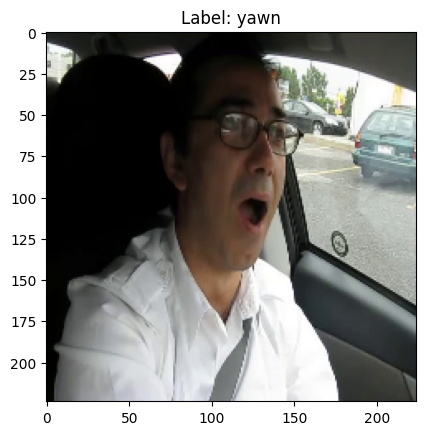

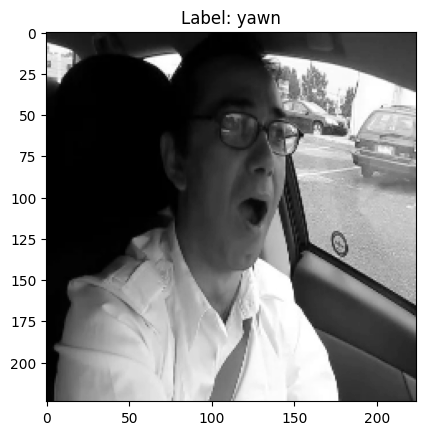

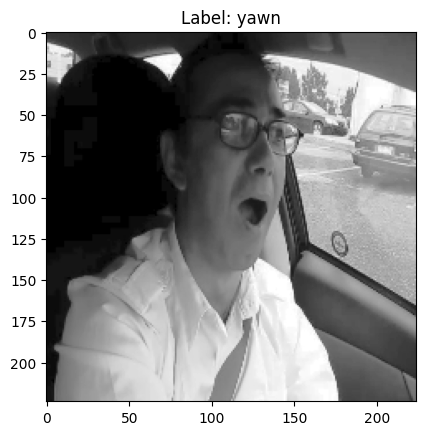

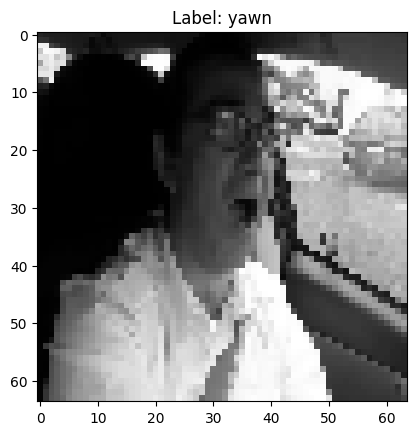

In [11]:
index = 0

plt.imshow(X_train[index], cmap='gray')
plt.title(f'Label: {y_train[index]}')
plt.show()

plt.imshow(X_train_grayscale[index], cmap='gray')
plt.title(f'Label: {y_train_grayscale[index]}')
plt.show()

plt.imshow(X_train_histogram_normalised[index], cmap='gray')
plt.title(f'Label: {y_train_histogram_normalised[index]}')
plt.show()

plt.imshow(X_train_resolution_64[index], cmap='gray')
plt.title(f'Label: {y_train_resolution_64[index]}')
plt.show()

In [12]:
# Label encoding and one-hot encoding for non-preprocessed data
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Label encoding and one-hot encoding for grayscale data
encoder = LabelEncoder()
y_train_grayscale = encoder.fit_transform(y_train_grayscale)
y_test_grayscale = encoder.transform(y_test_grayscale)
y_train_grayscale = to_categorical(y_train_grayscale)
y_test_grayscale = to_categorical(y_test_grayscale)

# Label encoding and one-hot encoding for histogram normalized data
encoder = LabelEncoder()
y_train_histogram_normalised = encoder.fit_transform(y_train_histogram_normalised)
y_test_histogram_normalised = encoder.transform(y_test_histogram_normalised)
y_train_histogram_normalised = to_categorical(y_train_histogram_normalised)
y_test_histogram_normalised = to_categorical(y_test_histogram_normalised)

# Label encoding and one-hot encoding for 64x64 resolution data
encoder = LabelEncoder()
y_train_resolution_64 = encoder.fit_transform(y_train_resolution_64)
y_test_resolution_64 = encoder.transform(y_test_resolution_64)
y_train_resolution_64 = to_categorical(y_train_resolution_64)
y_test_resolution_64 = to_categorical(y_test_resolution_64)

In [13]:
cnn = Sequential()

cnn.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(224,224, 3)))
cnn.add(MaxPooling2D(pool_size=2))

cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=2))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.5))

cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=2))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.2))

cnn.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=2))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.25))

cnn.add(Flatten())

cnn.add(Dense(units=128, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.25))

cnn.add(Dense(units=4, activation='softmax'))  # Adjust the number of units based on your classification task

# Compile the model
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
cnn2 = Sequential()

cnn2.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(224,224, 1)))
cnn2.add(MaxPooling2D(pool_size=2))

cnn2.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
cnn2.add(MaxPooling2D(pool_size=2))
cnn2.add(BatchNormalization())
cnn2.add(Dropout(0.5))

cnn2.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn2.add(MaxPooling2D(pool_size=2))
cnn2.add(BatchNormalization())
cnn2.add(Dropout(0.2))

cnn2.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn2.add(MaxPooling2D(pool_size=2))
cnn2.add(BatchNormalization())
cnn2.add(Dropout(0.25))

cnn2.add(Flatten())

cnn2.add(Dense(units=128, activation='relu'))
cnn2.add(BatchNormalization())
cnn2.add(Dropout(0.25))

cnn2.add(Dense(units=4, activation='softmax'))  # Adjust the number of units based on your classification task

# Compile the model
cnn2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
cnn3 = Sequential()

cnn3.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(64, 64, 1)))
cnn3.add(MaxPooling2D(pool_size=2))

cnn3.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
cnn3.add(MaxPooling2D(pool_size=2))
cnn3.add(BatchNormalization())
cnn3.add(Dropout(0.5))

cnn3.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn3.add(MaxPooling2D(pool_size=2))
cnn3.add(BatchNormalization())
cnn3.add(Dropout(0.2))

cnn3.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn3.add(MaxPooling2D(pool_size=2))
cnn3.add(BatchNormalization())
cnn3.add(Dropout(0.25))

cnn3.add(Flatten())

cnn3.add(Dense(units=128, activation='relu'))
cnn3.add(BatchNormalization())
cnn3.add(Dropout(0.25))

cnn3.add(Dense(units=4, activation='softmax'))  # Adjust the number of units based on your classification task

# Compile the model
cnn3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
cnn.summary()
cnn2.summary()
cnn3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 111, 111, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 55, 55, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 55, 55, 32)        128       
 Normalization)                                                  
                                                        

In [17]:
early_stopping = EarlyStopping(monitor='val_accuracy',patience=20,mode='max',verbose=1,restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',patience=5,mode='max',verbose=1,factor=0.1,min_lr=0.001)
checkpoint_filename = 'checkpoint/'
model_checkpoint = ModelCheckpoint(filepath=checkpoint_filename,monitor='val_accuracy',verbose=1,save_best_only=True,save_weights_only=True,mode='max')

r = cnn.fit(x=X_train,
            y=y_train,
            epochs=50,
            batch_size=32,
            validation_data=(X_test,y_test),
            callbacks=[early_stopping,reduce_lr,model_checkpoint])

Epoch 1/50
78/78 [==============================] - ETA: 0s - loss: 0.5821 - accuracy: 0.7448
Epoch 1: val_accuracy improved from -inf to 0.25173, saving model to checkpoint/
78/78 [==============================] - 16s 85ms/step - loss: 0.5821 - accuracy: 0.7448 - val_loss: 5.1721 - val_accuracy: 0.2517 - lr: 0.0010
Epoch 2/50
77/78 [============================>.] - ETA: 0s - loss: 0.4059 - accuracy: 0.8141
Epoch 2: val_accuracy improved from 0.25173 to 0.47113, saving model to checkpoint/
78/78 [==============================] - 4s 55ms/step - loss: 0.4064 - accuracy: 0.8141 - val_loss: 5.2311 - val_accuracy: 0.4711 - lr: 0.0010
Epoch 3/50
78/78 [==============================] - ETA: 0s - loss: 0.3143 - accuracy: 0.8558
Epoch 3: val_accuracy did not improve from 0.47113
78/78 [==============================] - 4s 50ms/step - loss: 0.3143 - accuracy: 0.8558 - val_loss: 5.9115 - val_accuracy: 0.2517 - lr: 0.0010
Epoch 4/50
77/78 [============================>.] - ETA: 0s - loss: 0.25

In [18]:
cnn.load_weights(checkpoint_filename)

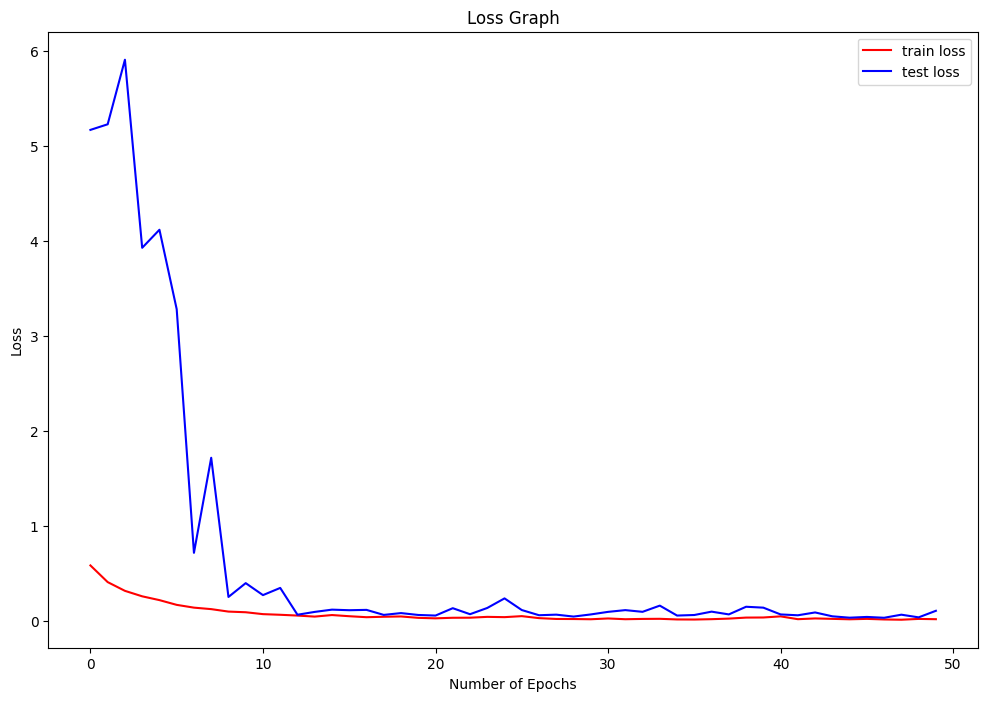

In [19]:
plt.figure(figsize=(12,8))
plt.plot(r.history['loss'],'r',label='train loss')
plt.plot(r.history['val_loss'],'b',label='test loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Loss Graph')
plt.legend();

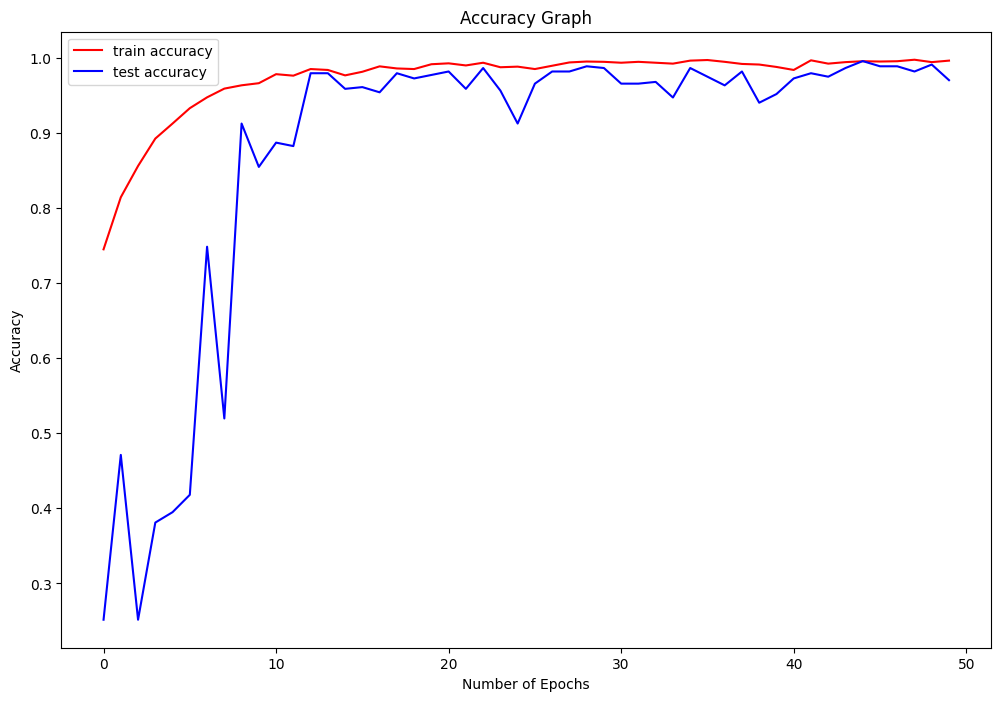

In [20]:
plt.figure(figsize=(12,8))
plt.plot(r.history['accuracy'],'r',label='train accuracy')
plt.plot(r.history['val_accuracy'],'b',label='test accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')
plt.legend();

In [21]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming you have already trained your model and obtained predictions
y_pred = cnn.predict(X_test)

# Convert one-hot encoded predictions and true labels back to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Create confusion matrix
conf_mat = confusion_matrix(y_true_classes, y_pred_classes)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_mat)

14/14 [==============================] - 1s 22ms/step
Confusion Matrix:
[[109   0   0   0]
 [  2 107   0   0]
 [  0   0 109   0]
 [  0   0   0 106]]


In [22]:
#GRAYSCALE Images
early_stopping = EarlyStopping(monitor='val_accuracy',patience=20,mode='max',verbose=1,restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',patience=5,mode='max',verbose=1,factor=0.1,min_lr=0.001)
checkpoint_filename = 'checkpoint_grayscale/'
model_checkpoint = ModelCheckpoint(filepath=checkpoint_filename,monitor='val_accuracy',verbose=1,save_best_only=True,save_weights_only=True,mode='max')

r = cnn2.fit(x=X_train_grayscale,
            y=y_train_grayscale,
            epochs=50,
            batch_size=32,
            validation_data=(X_test_grayscale,y_test_grayscale),
            callbacks=[early_stopping,reduce_lr,model_checkpoint])

Epoch 1/50
77/78 [============================>.] - ETA: 0s - loss: 0.6074 - accuracy: 0.7240
Epoch 1: val_accuracy improved from -inf to 0.25173, saving model to checkpoint_grayscale/
78/78 [==============================] - 7s 50ms/step - loss: 0.6081 - accuracy: 0.7236 - val_loss: 5.4506 - val_accuracy: 0.2517 - lr: 0.0010
Epoch 2/50
77/78 [============================>.] - ETA: 0s - loss: 0.3961 - accuracy: 0.8186
Epoch 2: val_accuracy did not improve from 0.25173
78/78 [==============================] - 3s 44ms/step - loss: 0.3973 - accuracy: 0.8173 - val_loss: 6.9841 - val_accuracy: 0.2517 - lr: 0.0010
Epoch 3/50
77/78 [============================>.] - ETA: 0s - loss: 0.3377 - accuracy: 0.8466
Epoch 3: val_accuracy improved from 0.25173 to 0.27945, saving model to checkpoint_grayscale/
78/78 [==============================] - 4s 46ms/step - loss: 0.3352 - accuracy: 0.8486 - val_loss: 4.7966 - val_accuracy: 0.2794 - lr: 0.0010
Epoch 4/50
77/78 [============================>.] - E

In [23]:
cnn2.load_weights(checkpoint_filename)

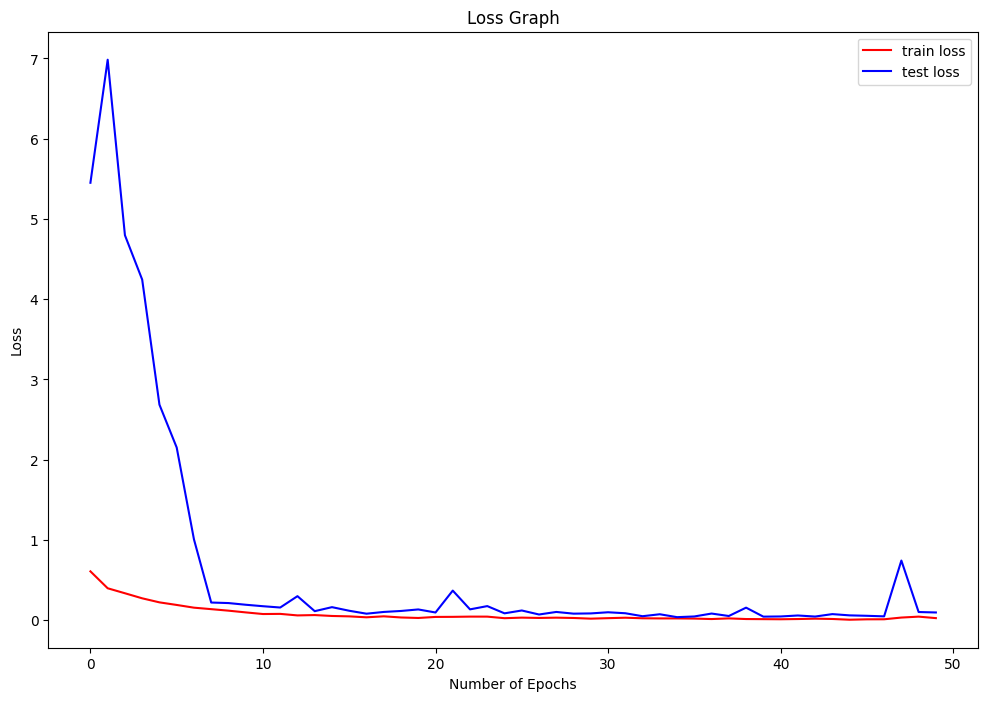

In [24]:
plt.figure(figsize=(12,8))
plt.plot(r.history['loss'],'r',label='train loss')
plt.plot(r.history['val_loss'],'b',label='test loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Loss Graph')
plt.legend();

In [25]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming you have already trained your model (cnn2) and obtained predictions
y_pred_grayscale = cnn2.predict(X_test_grayscale)

# Convert one-hot encoded predictions and true labels back to class labels
y_pred_classes_grayscale = np.argmax(y_pred_grayscale, axis=1)
y_true_classes_grayscale = np.argmax(y_test_grayscale, axis=1)

# Create confusion matrix
conf_mat_grayscale = confusion_matrix(y_true_classes_grayscale, y_pred_classes_grayscale)

# Print confusion matrix
print("Confusion Matrix (Grayscale):")
print(conf_mat_grayscale)

14/14 [==============================] - 0s 9ms/step
Confusion Matrix (Grayscale):
[[108   1   0   0]
 [  3 106   0   0]
 [  0   0 108   1]
 [  0   0   0 106]]


In [26]:
#HISTOGRAM NORMALISED


early_stopping = EarlyStopping(monitor='val_accuracy',patience=20,mode='max',verbose=1,restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',patience=5,mode='max',verbose=1,factor=0.1,min_lr=0.001)
checkpoint_filename = 'checkpoint_grayscale/'
model_checkpoint = ModelCheckpoint(filepath=checkpoint_filename,monitor='val_accuracy',verbose=1,save_best_only=True,save_weights_only=True,mode='max')

r = cnn2.fit(x=X_train_histogram_normalised,
            y=y_train_histogram_normalised,
            epochs=50,
            batch_size=32,
            validation_data=(X_test_histogram_normalised,y_test_histogram_normalised),
            callbacks=[early_stopping,reduce_lr,model_checkpoint])

Epoch 1/50
77/78 [============================>.] - ETA: 0s - loss: 0.0478 - accuracy: 0.9821
Epoch 1: val_accuracy improved from -inf to 0.87529, saving model to checkpoint_grayscale/
78/78 [==============================] - 4s 51ms/step - loss: 0.0481 - accuracy: 0.9820 - val_loss: 0.4337 - val_accuracy: 0.8753 - lr: 0.0010
Epoch 2/50
77/78 [============================>.] - ETA: 0s - loss: 0.0442 - accuracy: 0.9838
Epoch 2: val_accuracy improved from 0.87529 to 0.96536, saving model to checkpoint_grayscale/
78/78 [==============================] - 3s 45ms/step - loss: 0.0448 - accuracy: 0.9836 - val_loss: 0.0953 - val_accuracy: 0.9654 - lr: 0.0010
Epoch 3/50
77/78 [============================>.] - ETA: 0s - loss: 0.0267 - accuracy: 0.9894
Epoch 3: val_accuracy improved from 0.96536 to 0.97921, saving model to checkpoint_grayscale/
78/78 [==============================] - 3s 44ms/step - loss: 0.0264 - accuracy: 0.9896 - val_loss: 0.0730 - val_accuracy: 0.9792 - lr: 0.0010
Epoch 4/50

In [27]:
cnn2.load_weights(checkpoint_filename)

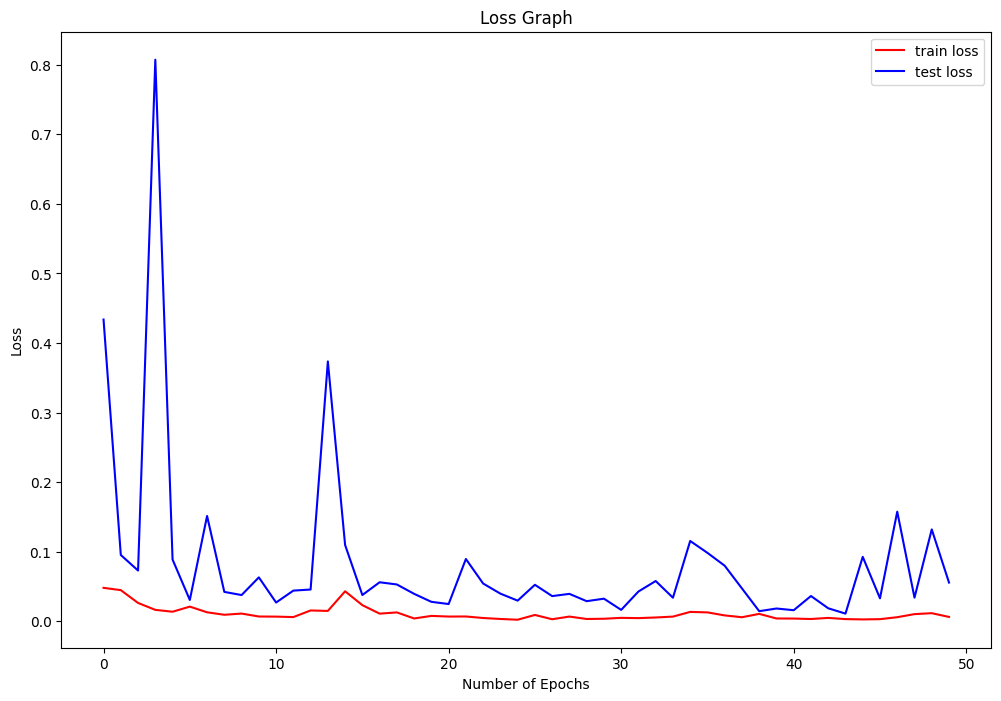

In [28]:
plt.figure(figsize=(12,8))
plt.plot(r.history['loss'],'r',label='train loss')
plt.plot(r.history['val_loss'],'b',label='test loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Loss Graph')
plt.legend();

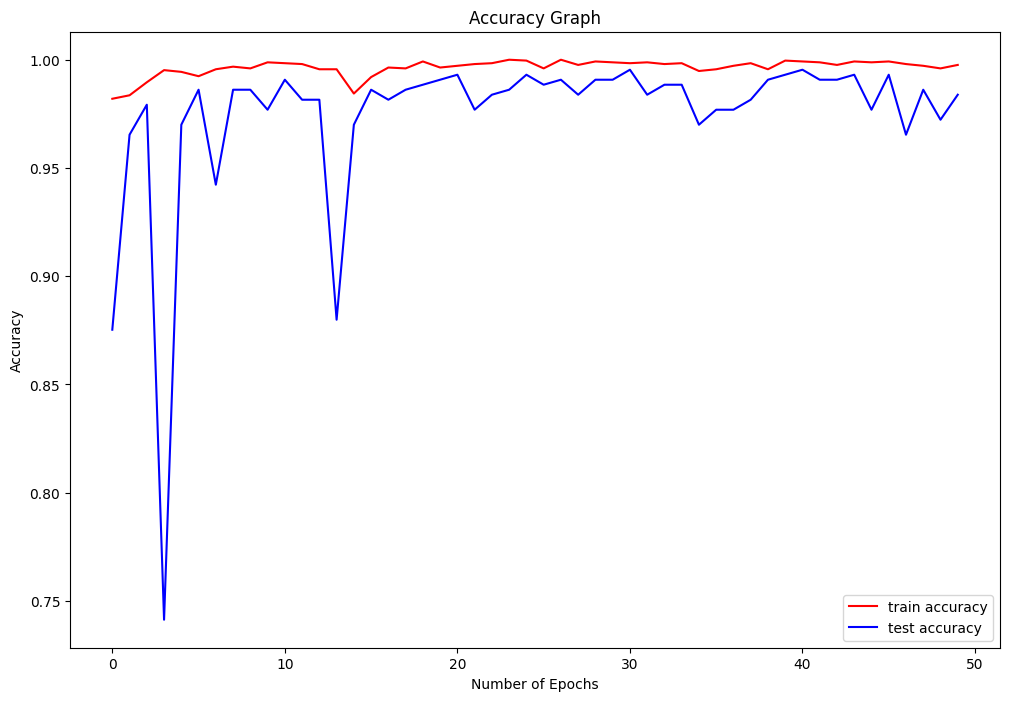

In [29]:
plt.figure(figsize=(12,8))
plt.plot(r.history['accuracy'],'r',label='train accuracy')
plt.plot(r.history['val_accuracy'],'b',label='test accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')
plt.legend();

In [30]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming you have already trained your model (cnn2) and obtained predictions
y_pred_histogram_normalized = cnn2.predict(X_test_histogram_normalised)

# Convert one-hot encoded predictions and true labels back to class labels
y_pred_classes_histogram_normalized = np.argmax(y_pred_histogram_normalized, axis=1)
y_true_classes_histogram_normalized = np.argmax(y_test_histogram_normalised, axis=1)

# Create confusion matrix
conf_mat_histogram_normalized = confusion_matrix(y_true_classes_histogram_normalized, y_pred_classes_histogram_normalized)

# Print confusion matrix
print("Confusion Matrix (Histogram Normalized):")
print(conf_mat_histogram_normalized)

14/14 [==============================] - 0s 9ms/step
Confusion Matrix (Histogram Normalized):
[[109   0   0   0]
 [  0 108   0   1]
 [  0   0 108   1]
 [  0   0   0 106]]


In [31]:
# early_stopping = EarlyStopping(monitor='val_accuracy',patience=20,mode='max',verbose=1,restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',patience=5,mode='max',verbose=1,factor=0.1,min_lr=0.001)
# checkpoint_filename = 'checkpoint_grayscale/'
# model_checkpoint = ModelCheckpoint(filepath=checkpoint_filename,monitor='val_accuracy',verbose=1,save_best_only=True,save_weights_only=True,mode='max')

# r = cnn3.fit(x=X_train_resolution_64,
#             y=y_train_resolution_64,
#             epochs=50,
#             batch_size=32,
#             validation_data=(X_test_resolution_64,y_test_resolution_64,
#             callbacks=[early_stopping,reduce_lr,model_checkpoint]))

early_stopping = EarlyStopping(monitor='val_accuracy',patience=20,mode='max',verbose=1,restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',patience=5,mode='max',verbose=1,factor=0.1,min_lr=0.001)
checkpoint_filename = 'checkpoint_grayscale/'
model_checkpoint = ModelCheckpoint(filepath=checkpoint_filename,monitor='val_accuracy',verbose=1,save_best_only=True,save_weights_only=True,mode='max')

r = cnn3.fit(x=X_train_resolution_64,
            y=y_train_resolution_64,
            epochs=50,
            batch_size=32,
            validation_data=(X_test_resolution_64,y_test_resolution_64),
            callbacks=[early_stopping,reduce_lr,model_checkpoint])

Epoch 1/50
76/78 [============================>.] - ETA: 0s - loss: 0.7430 - accuracy: 0.6793
Epoch 1: val_accuracy improved from -inf to 0.25173, saving model to checkpoint_grayscale/
78/78 [==============================] - 5s 16ms/step - loss: 0.7398 - accuracy: 0.6803 - val_loss: 3.1582 - val_accuracy: 0.2517 - lr: 0.0010
Epoch 2/50
71/78 [==========================>...] - ETA: 0s - loss: 0.4974 - accuracy: 0.7672
Epoch 2: val_accuracy did not improve from 0.25173
78/78 [==============================] - 1s 8ms/step - loss: 0.4951 - accuracy: 0.7692 - val_loss: 4.5734 - val_accuracy: 0.2517 - lr: 0.0010
Epoch 3/50
71/78 [==========================>...] - ETA: 0s - loss: 0.4649 - accuracy: 0.7790
Epoch 3: val_accuracy did not improve from 0.25173
78/78 [==============================] - 1s 8ms/step - loss: 0.4712 - accuracy: 0.7744 - val_loss: 4.5251 - val_accuracy: 0.2517 - lr: 0.0010
Epoch 4/50
74/78 [===========================>..] - ETA: 0s - loss: 0.4250 - accuracy: 0.7867
Epoc

In [32]:
cnn3.load_weights(checkpoint_filename)

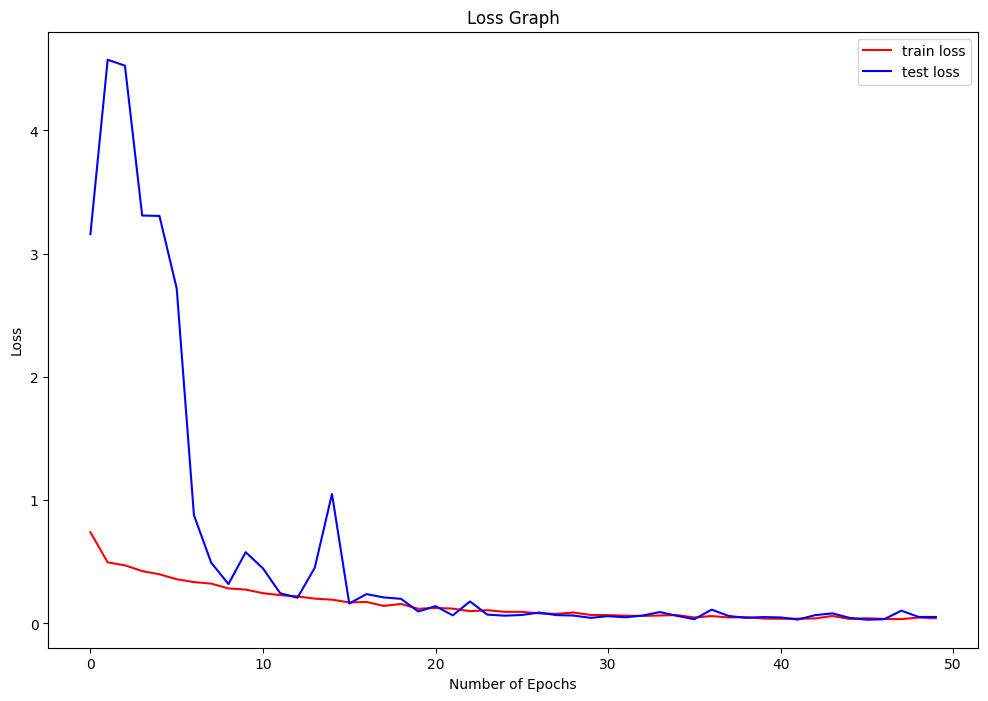

In [33]:
plt.figure(figsize=(12,8))
plt.plot(r.history['loss'],'r',label='train loss')
plt.plot(r.history['val_loss'],'b',label='test loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Loss Graph')
plt.legend();

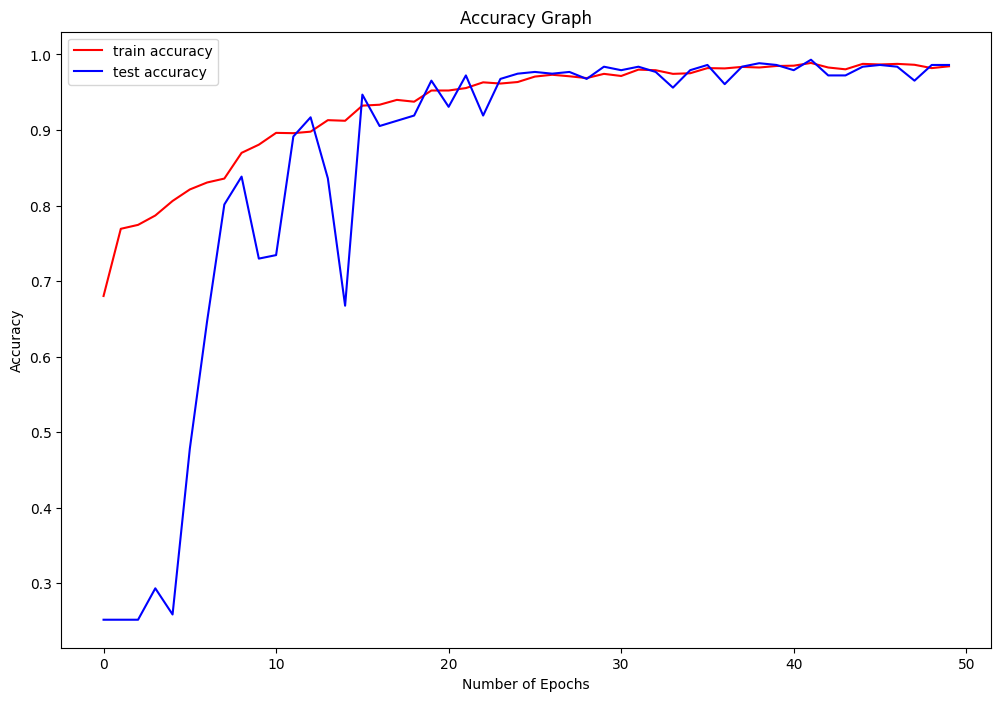

In [34]:
plt.figure(figsize=(12,8))
plt.plot(r.history['accuracy'],'r',label='train accuracy')
plt.plot(r.history['val_accuracy'],'b',label='test accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')
plt.legend();

In [35]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming you have already trained your model (cnn3) and obtained predictions
y_pred_resolution_64 = cnn3.predict(X_test_resolution_64)

# Convert one-hot encoded predictions and true labels back to class labels
y_pred_classes_resolution_64 = np.argmax(y_pred_resolution_64, axis=1)
y_true_classes_resolution_64 = np.argmax(y_test_resolution_64, axis=1)

# Create confusion matrix
conf_mat_resolution_64 = confusion_matrix(y_true_classes_resolution_64, y_pred_classes_resolution_64)

# Print confusion matrix
print("Confusion Matrix (Resolution 64x64):")
print(conf_mat_resolution_64)

14/14 [==============================] - 0s 3ms/step
Confusion Matrix (Resolution 64x64):
[[109   0   0   0]
 [  0 109   0   0]
 [  0   0 108   1]
 [  0   0   2 104]]


In [50]:
image_path='/content/drive/MyDrive/ Driver-Drowsiness-Detection-System/dataset_new/test/yawn/100.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (64, 64))

In [66]:
import cv2

# Load the image
image_path = '/content/drive/MyDrive/ Driver-Drowsiness-Detection-System/dataset_new/test/yawn/102.jpg'
image = cv2.imread(image_path)

# Check if the image is loaded successfully
if image is None:
    print("Error: Unable to read the image file at", image_path)
else:
    # Resize and preprocess the image
    image = cv2.resize(image, (224, 224))  # Resize image to match model's input shape
    image = image / 255.0  # Normalize pixel values to [0, 1]
    image = np.expand_dims(image, axis=0)


# Make prediction
prediction = cnn.predict(image)

# Print prediction
print("Prediction:", prediction)


1/1 [==============================] - 0s 261ms/step
Prediction: [[0.01642886 0.01486575 0.8118086  0.15689687]]


In [68]:
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image,(224,224))
import cv2

# Load the image
image_path = '/content/drive/MyDrive/ Driver-Drowsiness-Detection-System/dataset_new/test/yawn/102.jpg'
image = cv2.imread(image_path)

# Check if the image is loaded successfully
if image is None:
    print("Error: Unable to read the image file at", image_path)
else:
    # Resize and preprocess the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image,(224,224))
    image = image / 255.0  # Normalize pixel values to [0, 1]
    image = np.expand_dims(image, axis=0)


# Make prediction
prediction = cnn2.predict(image)

# Print prediction
print("Prediction:", prediction)


1/1 [==============================] - 0s 62ms/step
Prediction: [[7.5146565e-09 9.8080727e-06 8.4920536e-04 9.9914098e-01]]


In [58]:
# Load the image
image_path = '/content/drive/MyDrive/ Driver-Drowsiness-Detection-System/dataset_new/test/yawn/127.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded successfully
if image is None:
    print("Error: Unable to read the image file at", image_path)
else:
    # Check the dimensions of the loaded image
    print("Original Image Shape:", image.shape)

    # Resize the image to match the input size expected by your model
    image = cv2.resize(image, (64, 64))

    # Convert the image to a format suitable for prediction (e.g., normalize and reshape)
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    image = image / 255.0  # Normalize pixel values to the range [0, 1]

    # Make prediction
    prediction = cnn3.predict(image)

    # Print prediction
    print("Prediction:", prediction)


Original Image Shape: (480, 640)
1/1 [==============================] - 0s 34ms/step
Prediction: [[2.4456202e-07 2.9062903e-07 7.0268776e-05 9.9992931e-01]]


In [70]:

import tensorflow as tf

# Assuming you have trained a model and saved it in a variable called 'model'
# Example:
# model = your_model_training_process()

# Define a file path to save the model
model_path = '/content/drive/MyDrive/ Driver-Drowsiness-Detection-System/models/cnn.h5'
# Define a file path to save the model
model_path2 = '/content/drive/MyDrive/ Driver-Drowsiness-Detection-System/models/cnn2.h5'
# Define a file path to save the model
model_path3 = '/content/drive/MyDrive/ Driver-Drowsiness-Detection-System/models/cnn3.h5'

# Save the entire model (architecture, weights, and optimizer state)
tf.keras.models.save_model(cnn, model_path)

tf.keras.models.save_model(cnn2, model_path2)

tf.keras.models.save_model(cnn3, model_path3)
